In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
df = pd.read_csv("C:/Users/HP/Downloads/Banglore Housing Prices - Banglore Housing Prices.csv")

In [3]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [4]:
df.shape

(13320, 5)

In [5]:
df.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [8]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df.dropna(inplace = True)

In [10]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
# Transforming the Size column to numerical values
df['size'] = [int(value.split(' ')[0]) for value in df['size']]

In [13]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00


In [15]:
# Transforming the total_sqft column
df['total_sqft'].info()

<class 'pandas.core.series.Series'>
Index: 13246 entries, 0 to 13319
Series name: total_sqft
Non-Null Count  Dtype 
--------------  ----- 
13246 non-null  object
dtypes: object(1)
memory usage: 207.0+ KB


In [16]:
def convert_sqft(value):
    try:
        if '-' in value:
            # If the value is a single number,take the average
            start,end = map(float,value.split('-'))
            return (start+end)/2
        else:
            # If the value is a single number,convert it to float
            return float(value)
    except ValueError:
        return float('nan')

In [18]:
df['total_sqft'] = [convert_sqft(value) for value in df['total_sqft']]

In [19]:
df['total_sqft']

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 13246, dtype: float64

In [20]:
df['total_sqft'].isnull().sum()

46

In [21]:
df.dropna(inplace = True)

In [22]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [23]:
# Adding one more column as 'Price_Per_Sqft'
df['Price_Per_Sqft'] = df['price']/df['total_sqft']

In [24]:
df.head()

,location,size,total_sqft,bath,price,Price_Per_Sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,0.036998
1,Chikka Tirupathi,4,2600.0,5.0,120.00,0.046154
2,Uttarahalli,3,1440.0,2.0,62.00,0.043056
3,Lingadheeranahalli,3,1521.0,3.0,95.00,0.062459
4,Kothanur,2,1200.0,2.0,51.00,0.042500


In [25]:
# Checking and Removing Outliers
selected_columns = ['Price_Per_Sqft','size']
outliers = df[selected_columns]

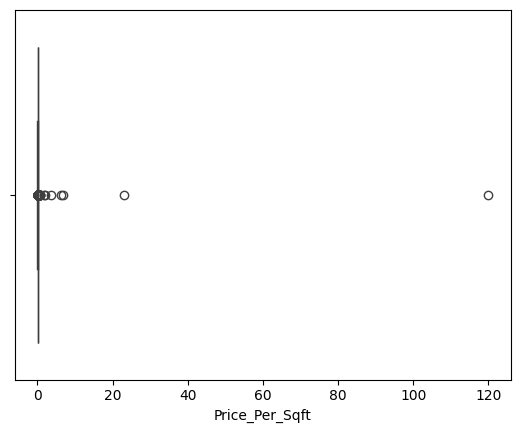

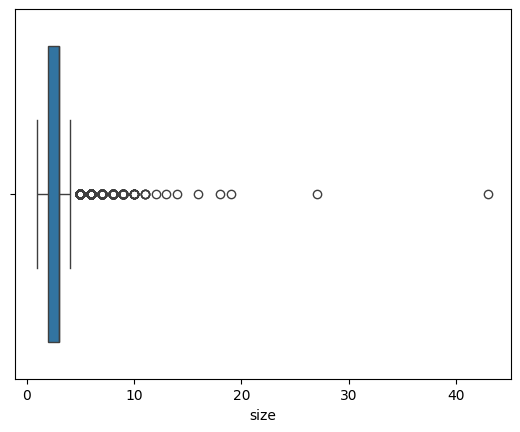

In [26]:
for i in outliers:
    sns.boxplot(x=df[i])
    plt.show()

In [37]:
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return column[(column >= lower_bound) & (column <= upper_bound)]

In [38]:
df['Price_Per_Sqft'] = remove_outliers(df['Price_Per_Sqft'])

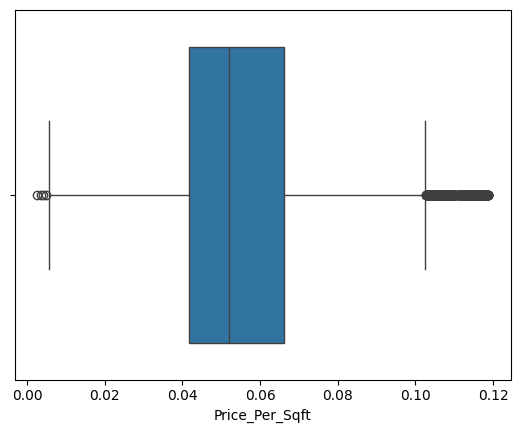

In [39]:
sns.boxplot(x = df['Price_Per_Sqft'])
plt.show()

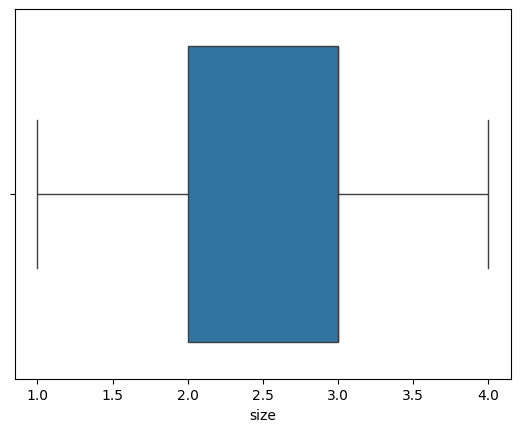

In [40]:
df['size'] = remove_outliers(df['size'])
sns.boxplot(x = df['size'])
plt.show()

In [41]:
df.isnull().sum()

location             0
size               835
total_sqft           0
bath                 0
price                0
Price_Per_Sqft    1265
dtype: int64

In [42]:
df.dropna(inplace = True)

In [43]:
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
Price_Per_Sqft    0
dtype: int64

In [44]:
df

,location,size,total_sqft,bath,price,Price_Per_Sqft
0,Electronic City Phase II,2.0,1056.0,2.0,39.07,0.036998
1,Chikka Tirupathi,4.0,2600.0,5.0,120.00,0.046154
2,Uttarahalli,3.0,1440.0,2.0,62.00,0.043056
3,Lingadheeranahalli,3.0,1521.0,3.0,95.00,0.062459
4,Kothanur,2.0,1200.0,2.0,51.00,0.042500
...,...,...,...,...,...,...
13314,Green Glen Layout,3.0,1715.0,3.0,112.00,0.065306
13316,Richards Town,4.0,3600.0,5.0,400.00,0.111111
13317,Raja Rajeshwari Nagar,2.0,1141.0,2.0,60.00,0.052585
13318,Padmanabhanagar,4.0,4689.0,4.0,488.00,0.104073


In [47]:
# Splitting the Dataset
X = df[['size','total_sqft','bath','Price_Per_Sqft']]
Y = df['price']

In [48]:
X

,size,total_sqft,bath,Price_Per_Sqft
0,2.0,1056.0,2.0,0.036998
1,4.0,2600.0,5.0,0.046154
2,3.0,1440.0,2.0,0.043056
3,3.0,1521.0,3.0,0.062459
4,2.0,1200.0,2.0,0.042500
...,...,...,...,...
13314,3.0,1715.0,3.0,0.065306
13316,4.0,3600.0,5.0,0.111111
13317,2.0,1141.0,2.0,0.052585
13318,4.0,4689.0,4.0,0.104073


In [49]:
Y

0         39.07
1        120.00
2         62.00
3         95.00
4         51.00
          ...  
13314    112.00
13316    400.00
13317     60.00
13318    488.00
13319     17.00
Name: price, Length: 11491, dtype: float64

In [50]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [51]:
# Training the model
model = LinearRegression()

In [52]:
model.fit(X_train,Y_train)

LinearRegression()

In [53]:
y_pred = model.predict(X_test)

In [54]:
mse = mean_squared_error(Y_test,y_pred)

In [55]:
r_squared = r2_score(Y_test,y_pred)

In [56]:
cv = np.mean(cross_val_score(model,X,Y,cv=5))

In [57]:
print(f'Mean Squared Error (MSE): {mse}')
print(f'R - Squared: {r_squared}')
print(f'Cross Validation Score: {cv}')

Mean Squared Error (MSE): 764.3991336999497
R - Squared: 0.8344041023140409
Cross Validation Score: 0.7637090338437833
